In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from tabulate import tabulate

In [111]:
metrics_dir = 'calculated/'
course_metrics = {}

for file in os.listdir(metrics_dir):
    course_name = os.fsdecode(file)
    dict_name = re.sub("[^0-9]", "", course_name)
    if dict_name == '':
        dict_name = 'ml_intro'
    course_metrics[dict_name] = pd.read_csv(metrics_dir+course_name).set_index('element_id').drop(columns='Unnamed: 0')

In [112]:
courses = list(course_metrics.keys())

In [113]:
courses

['638', '637', '584', '560', '587', 'ml_intro', '613']

In [114]:
mean_tries_threshold = 4
tries_std_threshold = 5
skips_percentage_threshold = 0.2
lost_percentage_threshold = 0.15
guessed_percentage_threshold = 0.2
solved_percentage_threshold = 0.88
mean_time_threshold = 7.5
N_tries_threshold = 10
diff_tries_threshold = 1
percentage_tries_threshold = 0.1


thresholds = {
    "mean_tries_count": mean_tries_threshold,
    "tries_std": tries_std_threshold,
    "skips_percentage": skips_percentage_threshold,
    "lost_percentage": lost_percentage_threshold,
    "guessed_percentage": guessed_percentage_threshold,
    "mean_time": mean_time_threshold,
    "solved_percentage": solved_percentage_threshold,
    'N_tries': N_tries_threshold,
    'diff_tries': diff_tries_threshold,
    'percentage_tries': percentage_tries_threshold
}

In [115]:
def study_correlation(df, x_name, y_name, nonlinear=False, mi_df=None, ax=None):
    print(f"Metrics: {x_name}, {y_name}")
    x = df[x_name]
    y = df[y_name]
    x_critical = thresholds[x_name]
    y_critical = thresholds[y_name]

    # fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, ax=ax)
    plt.axhline(y=y_critical, color="g")
    plt.axvline(x=x_critical, color="g")
    plt.xlabel(x_name)
    plt.ylabel(y_name)

    if nonlinear:
        print(f"Mutual information = {mi_df.loc[x_name, y_name]}")
    else:
        print(f"Pearson correlation coefficient = {x.corr(y)}")
    print("Amount by segments:")
    left_up = len(df[(df[x_name] <= x_critical) & (df[y_name] > y_critical)])
    left_down = len(df[(df[x_name] <= x_critical) & (df[y_name] <= y_critical)])
    right_up = len(df[(df[x_name] > x_critical) & (df[y_name] > y_critical)])
    right_down = len(df[(df[x_name] > x_critical) & (df[y_name] <= y_critical)])
    print(
        tabulate([[left_up, right_up], [left_down, right_down]], tablefmt="fancy_grid")
    )

    plt.show()

In [116]:
def heatmap(name):
    sns.heatmap(course_metrics[name].corr(), vmin=-1, vmax=1)
    plt.title(name)
    plt.show()

In [117]:
def all_courses_linear_corr(x_name, y_name):
    for course in courses:
        print('Курс', course)
        print()
        study_correlation(course_metrics[course], x_name, y_name)
        print()
        print('=====================================================')

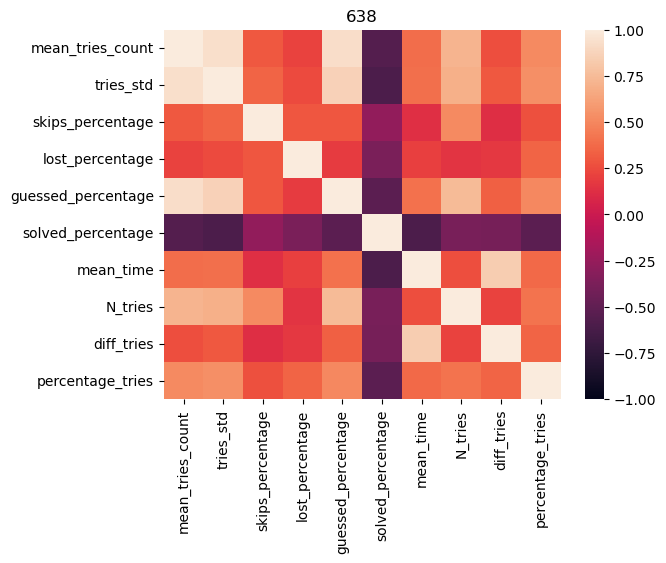

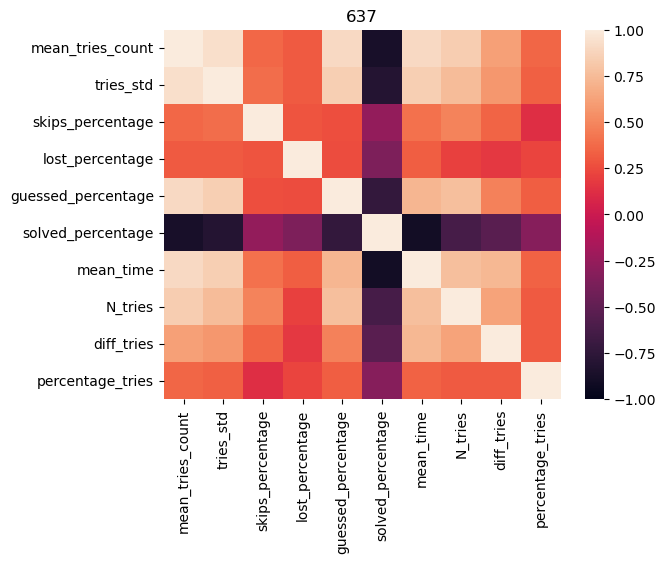

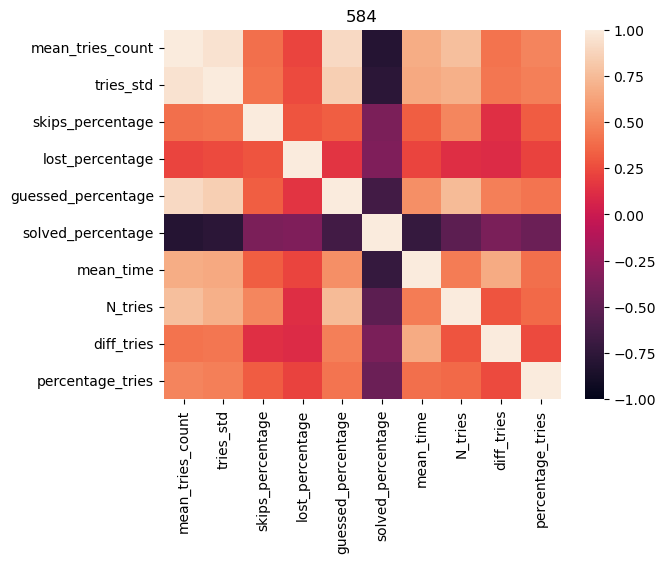

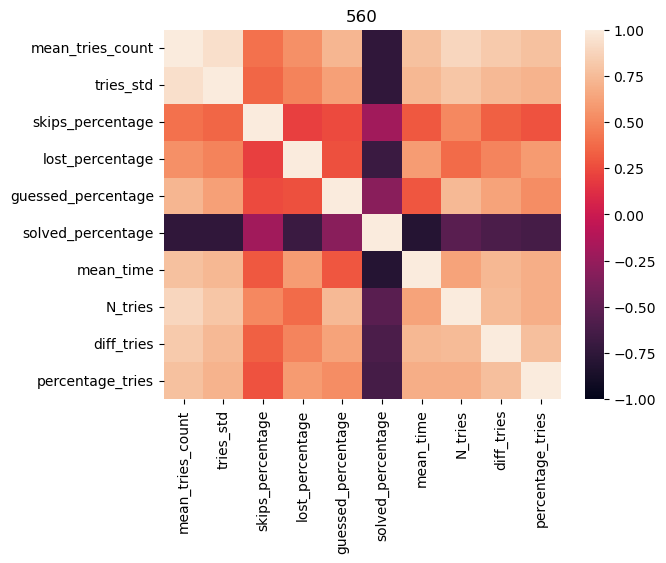

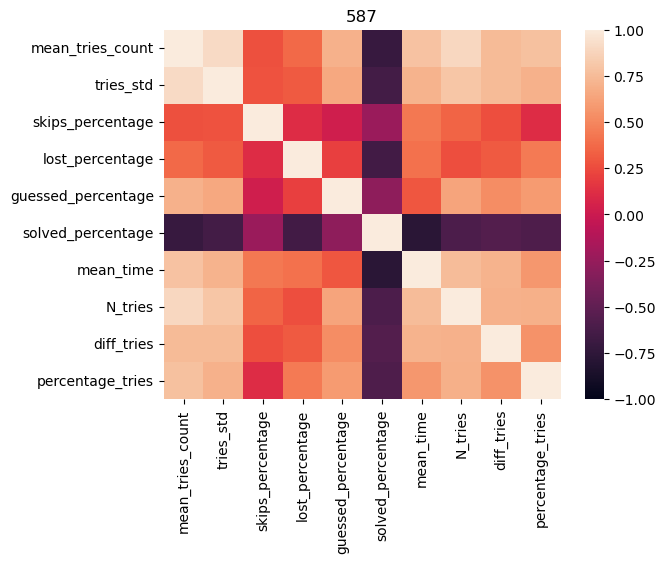

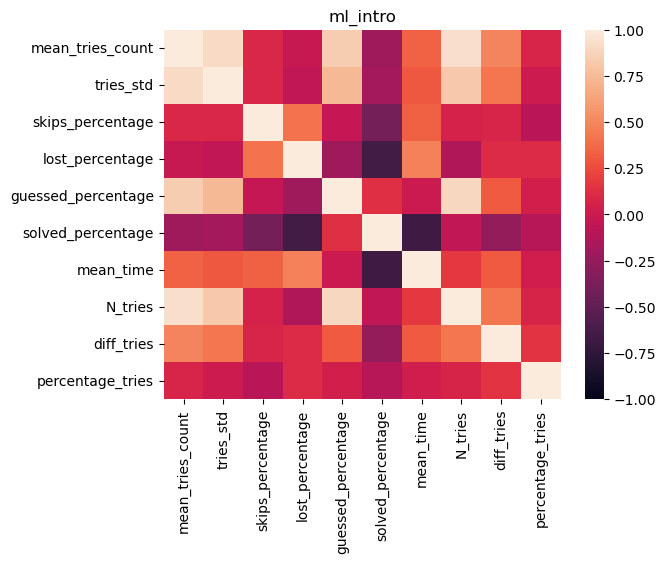

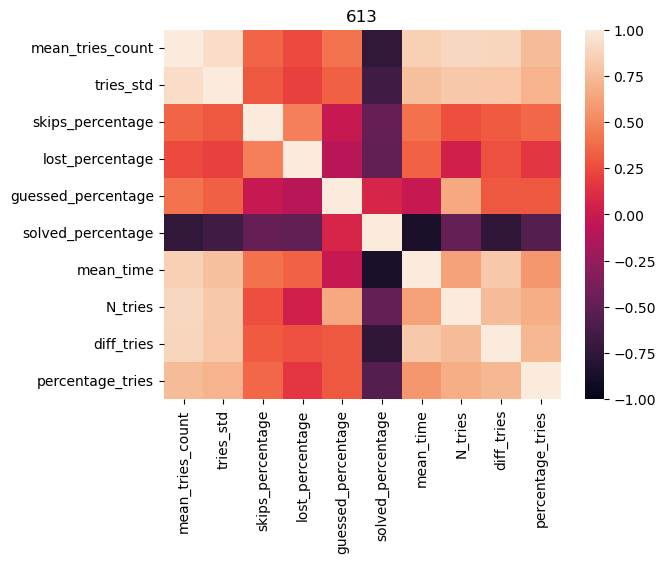

In [118]:
for course in courses:
    heatmap(course)

### mean_tries, tries_std

- сильно коррелируют на всех курсах
- не разделяют друг друга
- оставим mean_tries как более интерпретируемую

Курс 638

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.9333429864011437
Amount by segments:
╒═════╤═════╕
│  34 │ 121 │
├─────┼─────┤
│ 497 │   6 │
╘═════╧═════╛


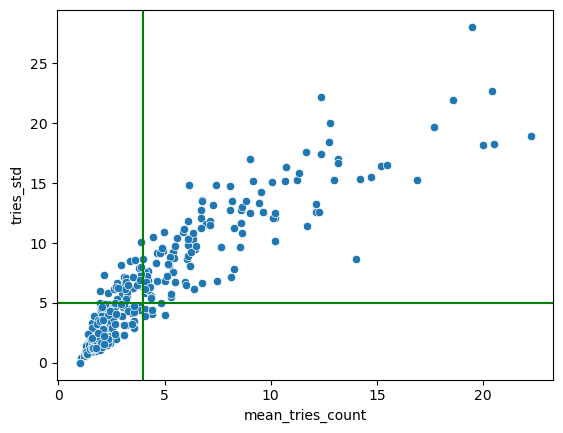


Курс 637

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.933906183042899
Amount by segments:
╒═════╤════╕
│   8 │ 15 │
├─────┼────┤
│ 354 │  1 │
╘═════╧════╛


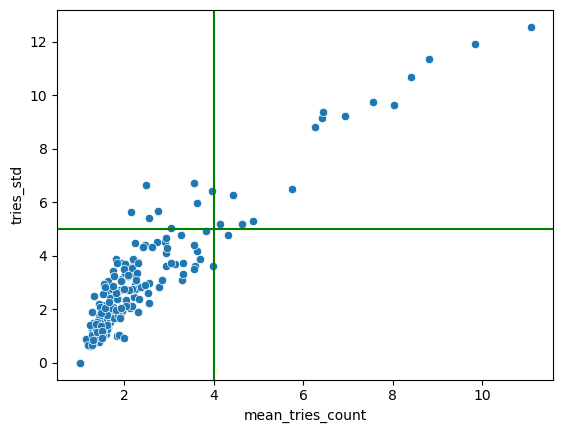


Курс 584

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.9487112018831634
Amount by segments:
╒═════╤════╕
│  26 │ 45 │
├─────┼────┤
│ 429 │  2 │
╘═════╧════╛


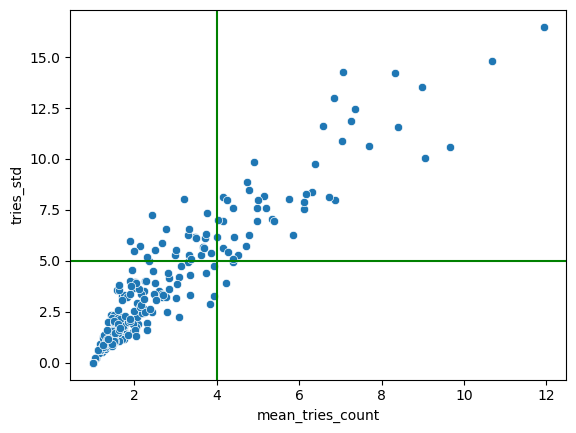


Курс 560

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.9367931040195674
Amount by segments:
╒═════╤═════╕
│  17 │ 122 │
├─────┼─────┤
│ 293 │  10 │
╘═════╧═════╛


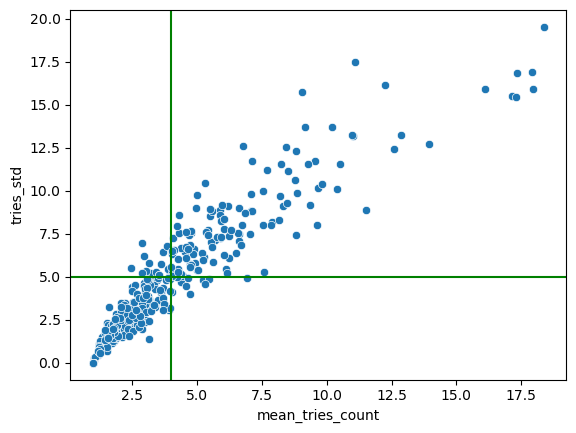


Курс 587

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.9129355593831647
Amount by segments:
╒═════╤════╕
│  23 │ 49 │
├─────┼────┤
│ 266 │  9 │
╘═════╧════╛


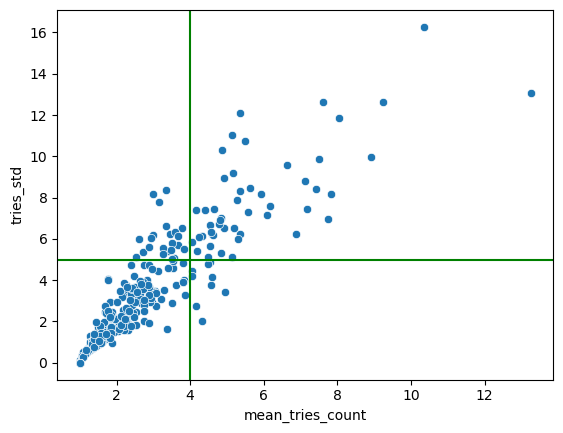


Курс ml_intro

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.9064006858039064
Amount by segments:
╒═════╤════╕
│  16 │ 56 │
├─────┼────┤
│ 218 │  4 │
╘═════╧════╛


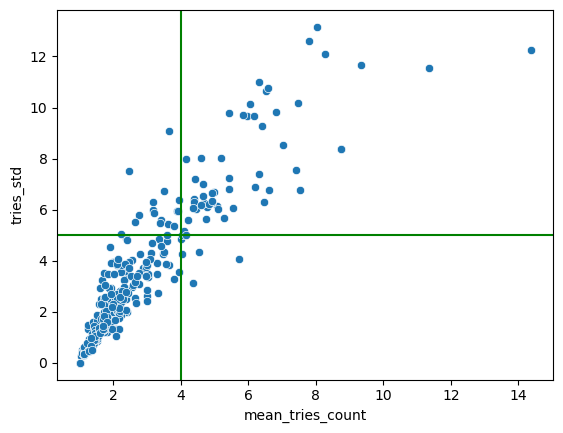


Курс 613

Metrics: mean_tries_count, tries_std
Pearson correlation coefficient = 0.9251862588378931
Amount by segments:
╒═════╤═══╕
│   0 │ 1 │
├─────┼───┤
│ 147 │ 1 │
╘═════╧═══╛


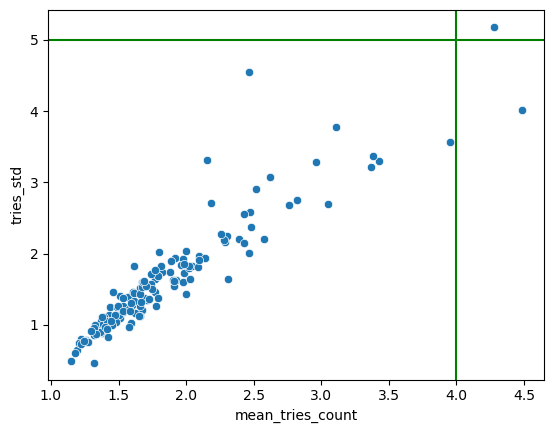

In [119]:
all_courses_linear_corr('mean_tries_count', 'tries_std')

### mean_tries, diff_tries

- везде очень сильно коррелируют
- несмотря на это, по diff_tries задача может быть для данного пользователя легче остальных в модуле, и это важная информация. На многих курсах задачи, сложные по mean_tries, существенно разделились по diff_tries.
- из-за структуры отчета она во многом дублирует mean_tries (так как можно нарисовать barplot для mean_tries и увидеть различия, или просто сравнить в таблице)
- оставим mean_tries как более понятную

Курс 638

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.2590642644646566
Amount by segments:
╒═════╤════╕
│  34 │ 96 │
├─────┼────┤
│ 497 │ 31 │
╘═════╧════╛


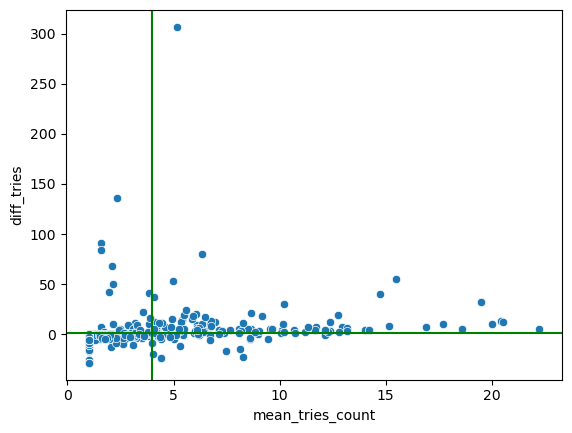


Курс 637

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.6155350024342977
Amount by segments:
╒═════╤════╕
│  21 │ 13 │
├─────┼────┤
│ 341 │  3 │
╘═════╧════╛


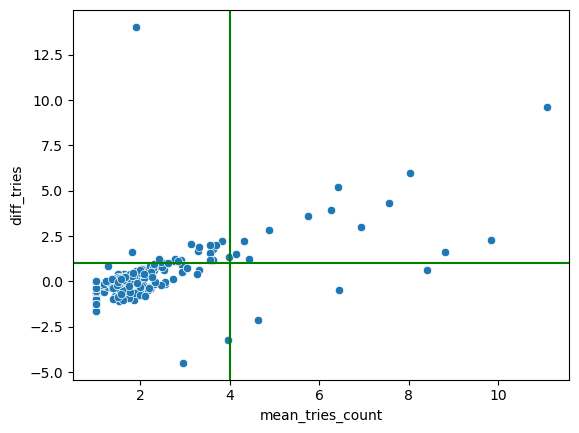


Курс 584

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.4105686511863482
Amount by segments:
╒═════╤════╕
│  26 │ 42 │
├─────┼────┤
│ 429 │  5 │
╘═════╧════╛


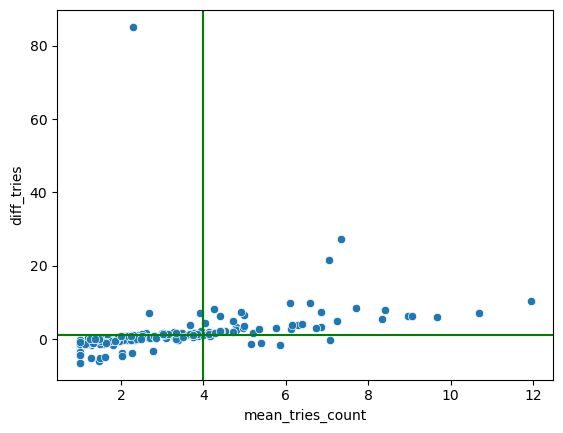


Курс 560

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.8205704169310364
Amount by segments:
╒═════╤════╕
│   8 │ 87 │
├─────┼────┤
│ 302 │ 45 │
╘═════╧════╛


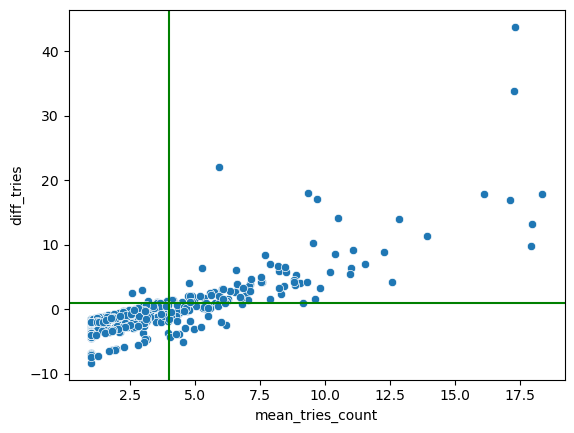


Курс 587

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.747951738546946
Amount by segments:
╒═════╤════╕
│  12 │ 50 │
├─────┼────┤
│ 277 │  8 │
╘═════╧════╛


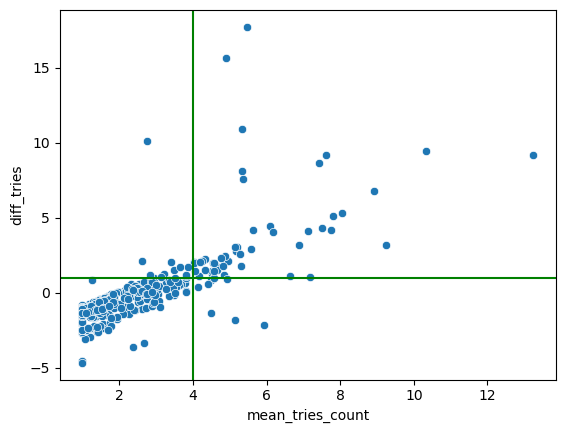


Курс ml_intro

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.48554135410264765
Amount by segments:
╒═════╤════╕
│  10 │ 42 │
├─────┼────┤
│ 224 │ 18 │
╘═════╧════╛


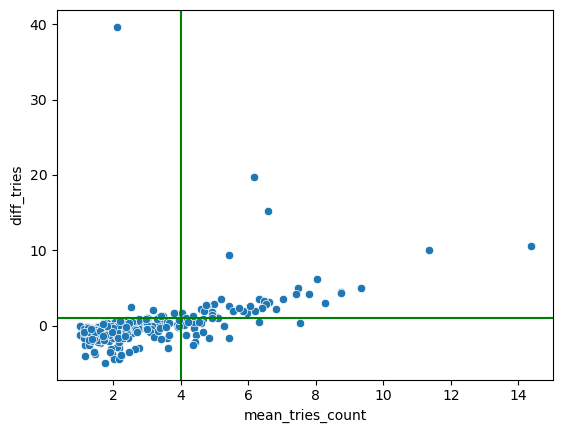


Курс 613

Metrics: mean_tries_count, diff_tries
Pearson correlation coefficient = 0.8900462475347133
Amount by segments:
╒═════╤═══╕
│   5 │ 2 │
├─────┼───┤
│ 142 │ 0 │
╘═════╧═══╛


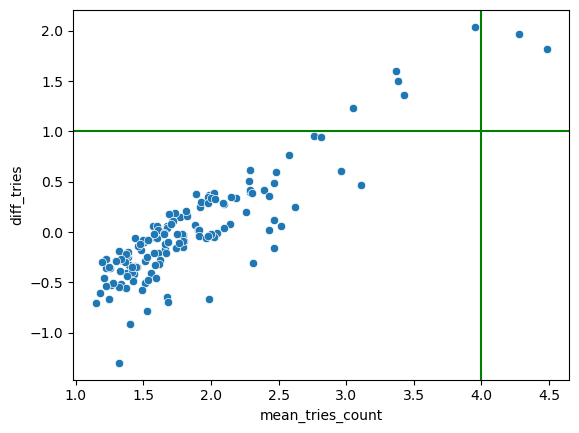

In [120]:
all_courses_linear_corr('mean_tries_count', 'diff_tries')

### mean_tries, mean_time

- коррелируют довольно сильно
- для некоторых курсов задачи с большим кол-вом попыток неплохо разделяются по времени
- может нужно время на одну попытку?

Курс 638

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.38562389017367144
Amount by segments:
╒═════╤═════╕
│  10 │  20 │
├─────┼─────┤
│ 521 │ 107 │
╘═════╧═════╛


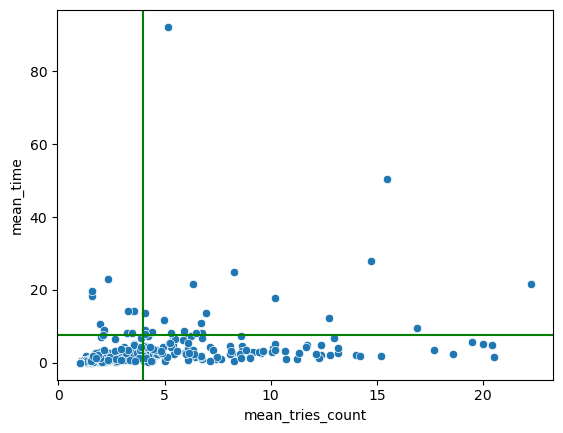


Курс 637

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.9036479663105215
Amount by segments:
╒═════╤════╕
│   0 │  2 │
├─────┼────┤
│ 362 │ 14 │
╘═════╧════╛


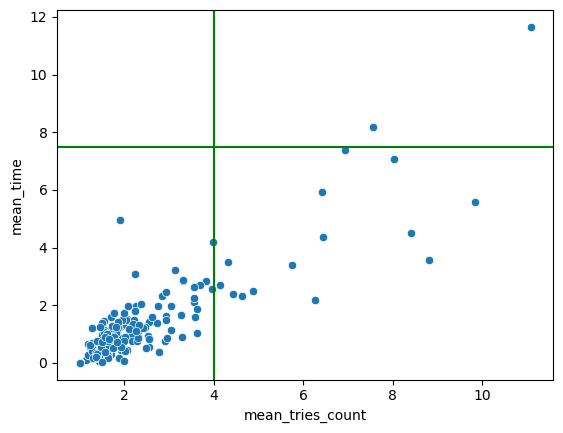


Курс 584

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.675251406142753
Amount by segments:
╒═════╤════╕
│   2 │  3 │
├─────┼────┤
│ 453 │ 44 │
╘═════╧════╛


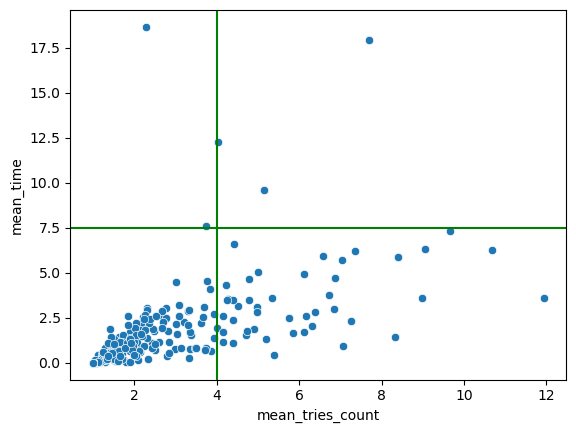


Курс 560

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.7804109583210921
Amount by segments:
╒═════╤════╕
│   3 │ 53 │
├─────┼────┤
│ 307 │ 79 │
╘═════╧════╛


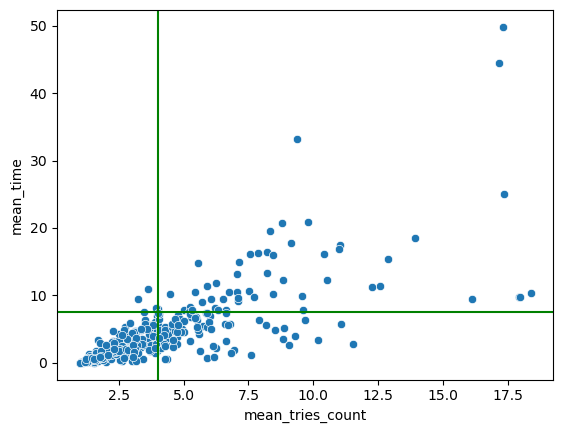


Курс 587

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.786254125252264
Amount by segments:
╒═════╤════╕
│   0 │ 13 │
├─────┼────┤
│ 289 │ 45 │
╘═════╧════╛


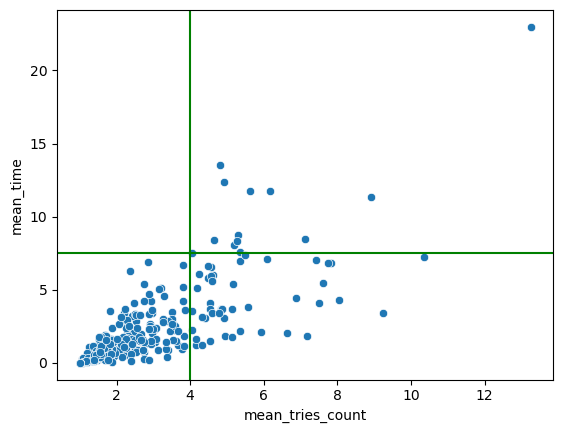


Курс ml_intro

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.3387544139123604
Amount by segments:
╒═════╤════╕
│   4 │  4 │
├─────┼────┤
│ 230 │ 56 │
╘═════╧════╛


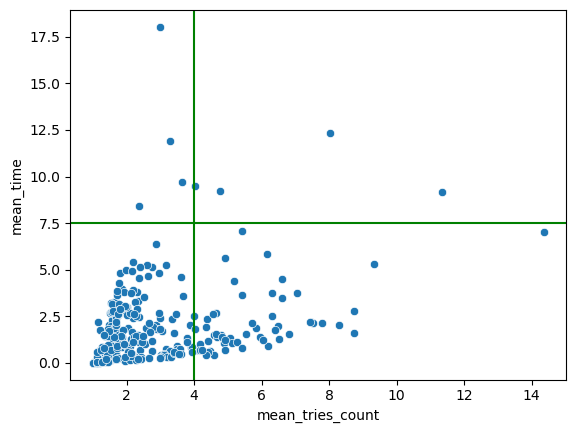


Курс 613

Metrics: mean_tries_count, mean_time
Pearson correlation coefficient = 0.8534915235097077
Amount by segments:
╒═════╤═══╕
│   3 │ 1 │
├─────┼───┤
│ 144 │ 1 │
╘═════╧═══╛


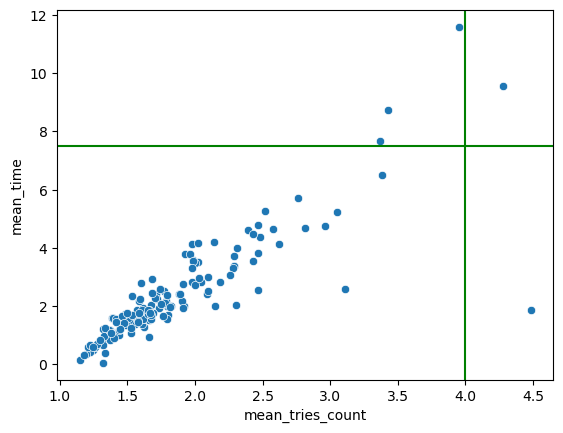

In [121]:
all_courses_linear_corr("mean_tries_count", "mean_time")

### mean_tries_count, guessed_percentage

- аналогично
- линейная корреляция не всегда сильная, можно поискать нелинейные на сложных задачах

Курс 638

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.9233331231673932
Amount by segments:
╒═════╤════╕
│   4 │ 79 │
├─────┼────┤
│ 527 │ 48 │
╘═════╧════╛


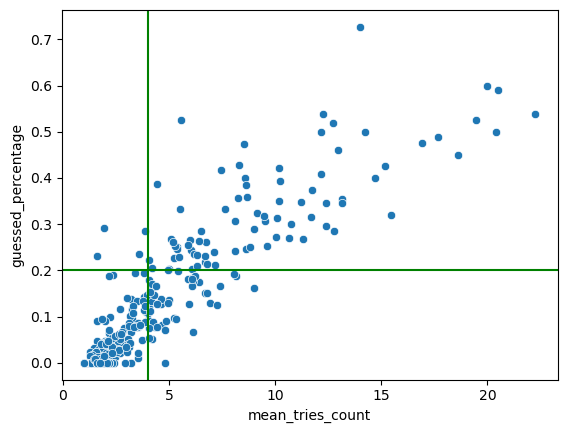


Курс 637

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.901097946925215
Amount by segments:
╒═════╤════╕
│   0 │  3 │
├─────┼────┤
│ 362 │ 13 │
╘═════╧════╛


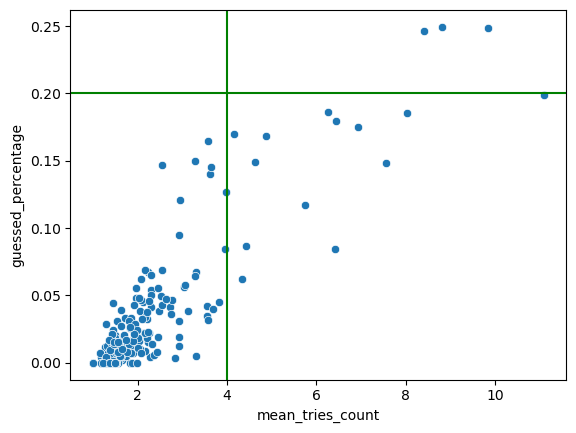


Курс 584

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.9010017915926599
Amount by segments:
╒═════╤════╕
│   0 │ 15 │
├─────┼────┤
│ 455 │ 32 │
╘═════╧════╛


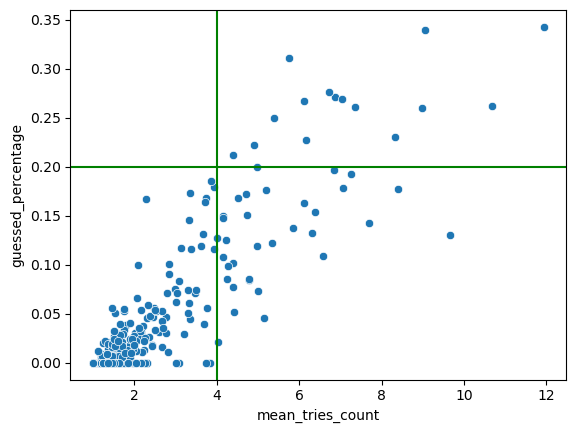


Курс 560

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.7219135706311156
Amount by segments:
╒═════╤═════╕
│   0 │  19 │
├─────┼─────┤
│ 310 │ 113 │
╘═════╧═════╛


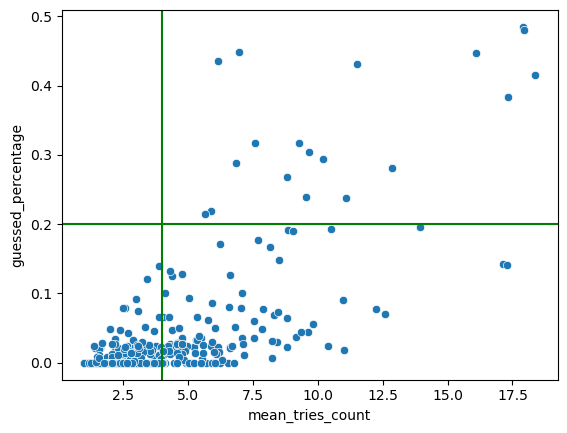


Курс 587

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.7004744291943508
Amount by segments:
╒═════╤════╕
│   0 │  9 │
├─────┼────┤
│ 289 │ 49 │
╘═════╧════╛


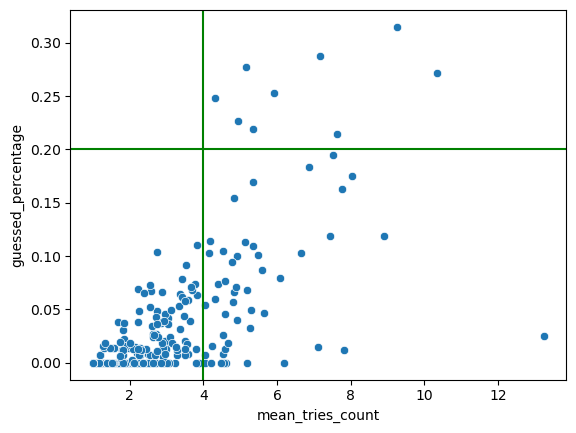


Курс ml_intro

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.8412618422188181
Amount by segments:
╒═════╤════╕
│   1 │ 16 │
├─────┼────┤
│ 233 │ 44 │
╘═════╧════╛


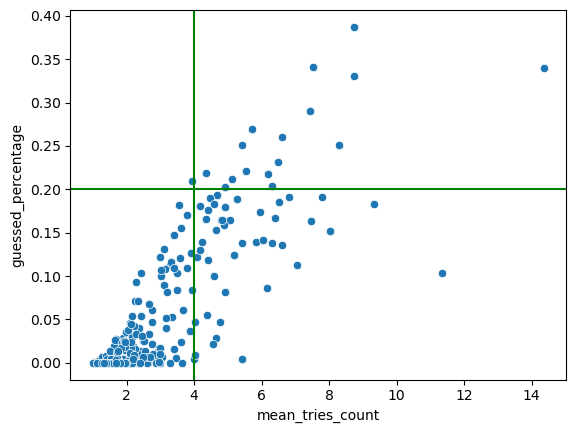


Курс 613

Metrics: mean_tries_count, guessed_percentage
Pearson correlation coefficient = 0.40639684002839493
Amount by segments:
╒═════╤═══╕
│   0 │ 0 │
├─────┼───┤
│ 147 │ 2 │
╘═════╧═══╛


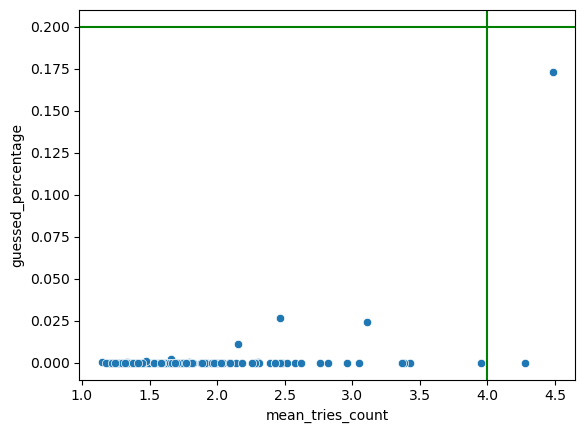

In [122]:
all_courses_linear_corr('mean_tries_count', 'guessed_percentage')

### lost_percentage, solved_percentage

- в большинстве случаев коррелируют не очень сильно

Курс 638

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.3801833705746374
Amount by segments:
╒═════╤════╕
│ 417 │ 92 │
├─────┼────┤
│  27 │ 35 │
╘═════╧════╛


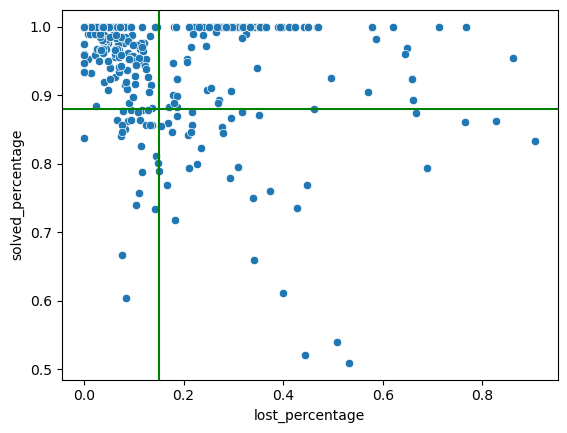


Курс 637

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.36363857616666817
Amount by segments:
╒═════╤════╕
│ 306 │ 13 │
├─────┼────┤
│   6 │  2 │
╘═════╧════╛


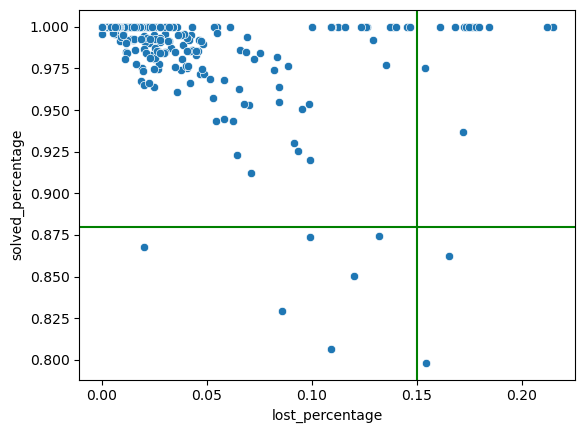


Курс 584

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.3552801954707764
Amount by segments:
╒═════╤════╕
│ 350 │ 59 │
├─────┼────┤
│  11 │ 13 │
╘═════╧════╛


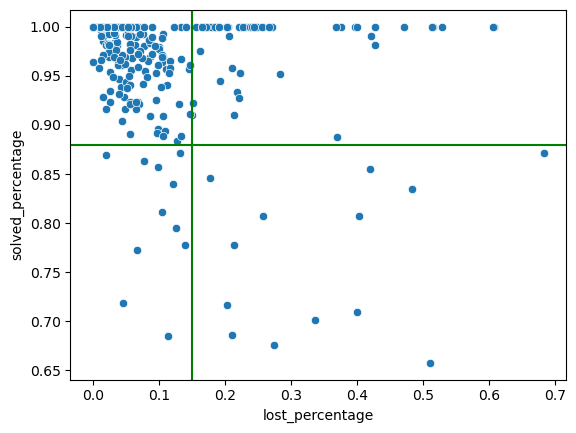


Курс 560

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.6882402538432731
Amount by segments:
╒═════╤════╕
│ 231 │ 18 │
├─────┼────┤
│  55 │ 44 │
╘═════╧════╛


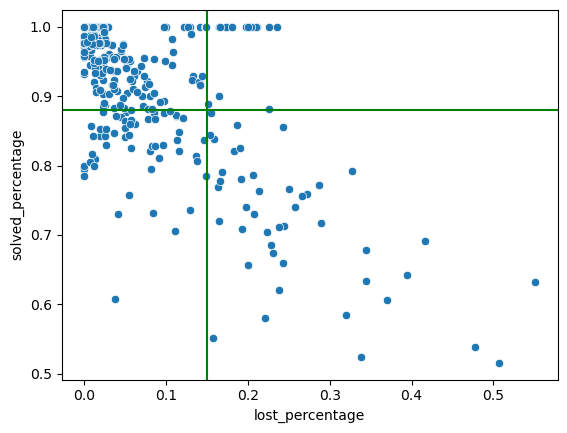


Курс 587

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.6534463579584935
Amount by segments:
╒═════╤════╕
│ 248 │  6 │
├─────┼────┤
│  12 │ 11 │
╘═════╧════╛


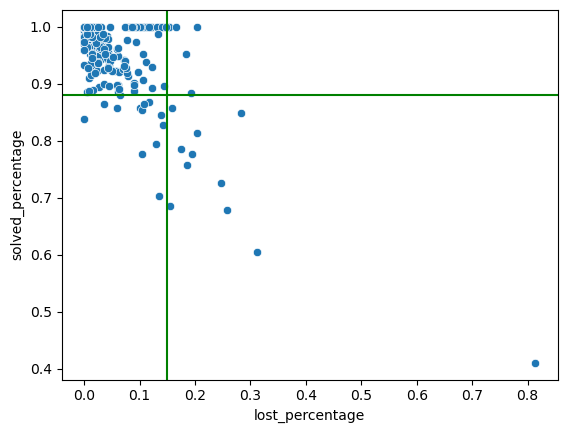


Курс ml_intro

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.641144907590963
Amount by segments:
╒═════╤════╕
│ 136 │ 22 │
├─────┼────┤
│   5 │ 30 │
╘═════╧════╛


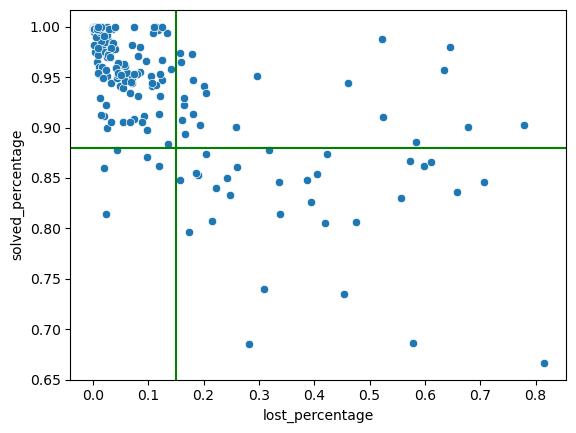


Курс 613

Metrics: lost_percentage, solved_percentage
Pearson correlation coefficient = -0.4944848514594949
Amount by segments:
╒════╤════╕
│ 94 │ 16 │
├────┼────┤
│  3 │  3 │
╘════╧════╛


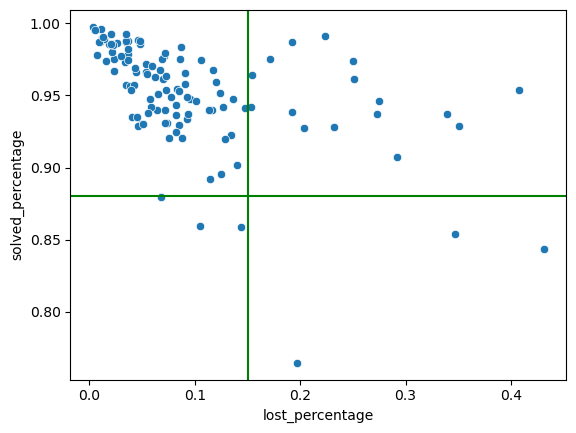

In [123]:
all_courses_linear_corr('lost_percentage', 'solved_percentage')

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.09551766989255371
Amount by segments:
╒═════╤════╕
│  87 │ 66 │
├─────┼────┤
│ 365 │ 62 │
╘═════╧════╛


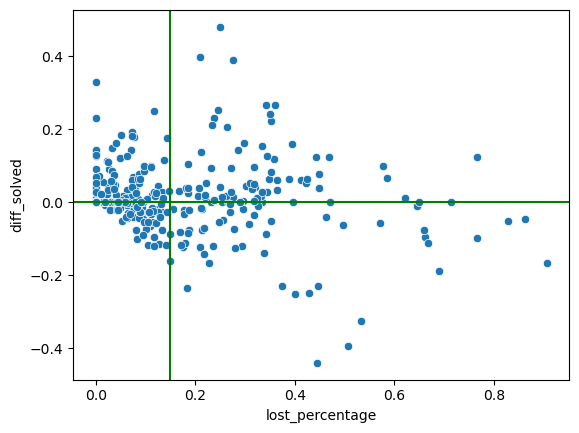

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.06695056422512492
Amount by segments:
╒═════╤═══╕
│  85 │ 9 │
├─────┼───┤
│ 227 │ 6 │
╘═════╧═══╛


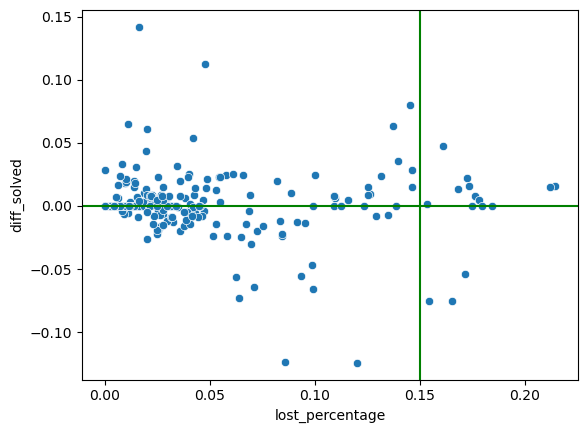

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.06281273572986396
Amount by segments:
╒═════╤════╕
│  90 │ 38 │
├─────┼────┤
│ 286 │ 36 │
╘═════╧════╛


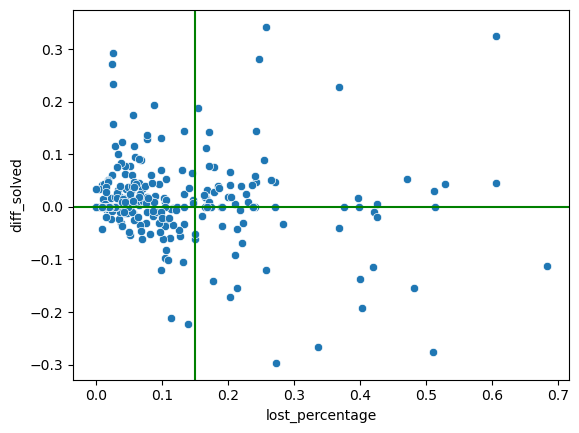

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.5958246196785535
Amount by segments:
╒═════╤════╕
│ 128 │ 15 │
├─────┼────┤
│ 158 │ 47 │
╘═════╧════╛


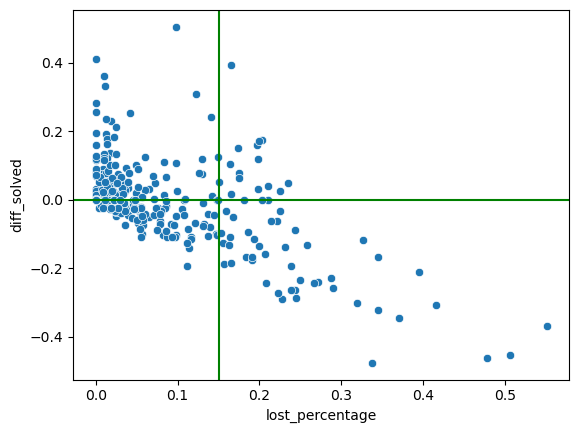

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.504130986431993
Amount by segments:
╒═════╤════╕
│ 127 │  3 │
├─────┼────┤
│ 134 │ 14 │
╘═════╧════╛


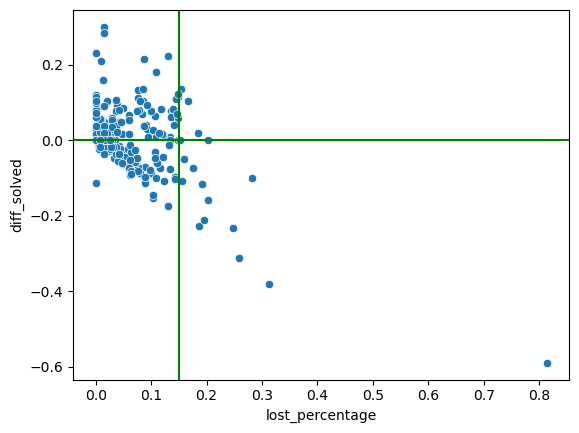

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.5025842632256536
Amount by segments:
╒═════╤═════╕
│ 388 │  34 │
├─────┼─────┤
│ 332 │ 176 │
╘═════╧═════╛


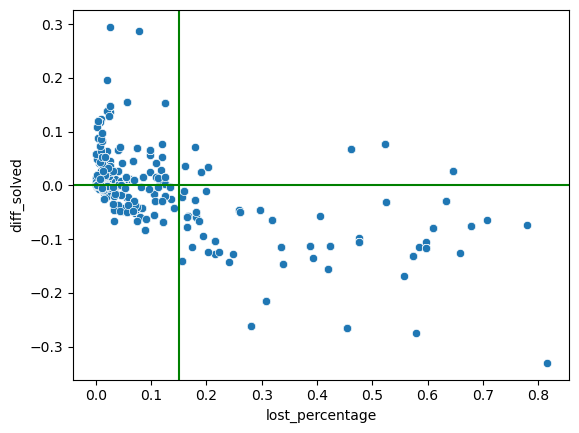

Metrics: lost_percentage, diff_solved
Pearson correlation coefficient = -0.4800409701883696
Amount by segments:
╒════╤════╕
│ 40 │  7 │
├────┼────┤
│ 57 │ 12 │
╘════╧════╛


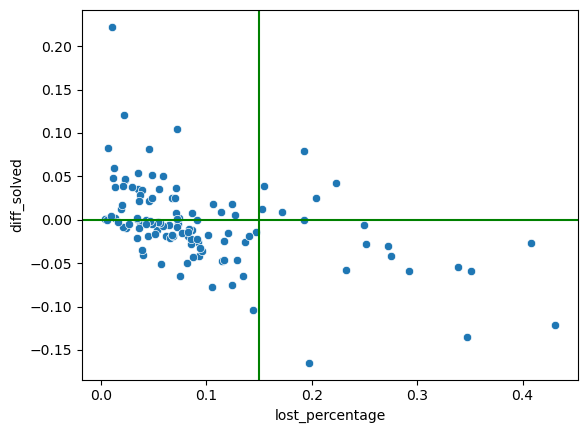

In [92]:
# проверим, что lost_percentage не сильно коррелирует с разницей solved_percentage для соседних задач
for course in courses:
    df = course_metrics[course].merge(course_elements[course], left_index=True, right_index=True)
    df = df.sort_values(by=['module_id', 'position'])
    df['diff_solved'] = df['solved_percentage'] - df['solved_percentage'].shift()
    study_correlation(df.reset_index(), 'lost_percentage', 'diff_solved')

### solved_percentage, mean_time

- хорошо разделяются легкие по времени задачи
- может помочь ловить задачи со сложной/непонятной формулировкой; задачи, на которых быстро сдаются

Курс 638

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.5979223442528219
Amount by segments:
╒═════╤════╕
│ 572 │  8 │
├─────┼────┤
│  56 │ 22 │
╘═════╧════╛


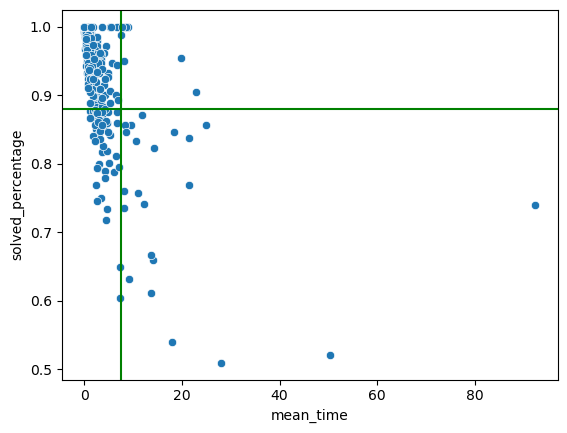


Курс 637

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.9043812297614349
Amount by segments:
╒═════╤═══╕
│ 369 │ 0 │
├─────┼───┤
│   7 │ 2 │
╘═════╧═══╛


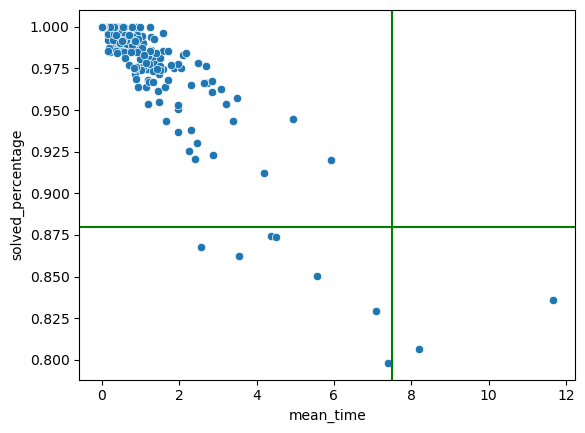


Курс 584

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.7140531215727336
Amount by segments:
╒═════╤═══╕
│ 468 │ 1 │
├─────┼───┤
│  29 │ 4 │
╘═════╧═══╛


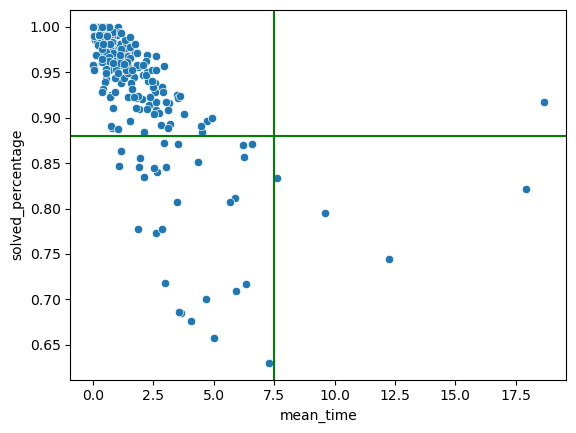


Курс 560

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.797480570574817
Amount by segments:
╒═════╤════╕
│ 321 │  7 │
├─────┼────┤
│  65 │ 49 │
╘═════╧════╛


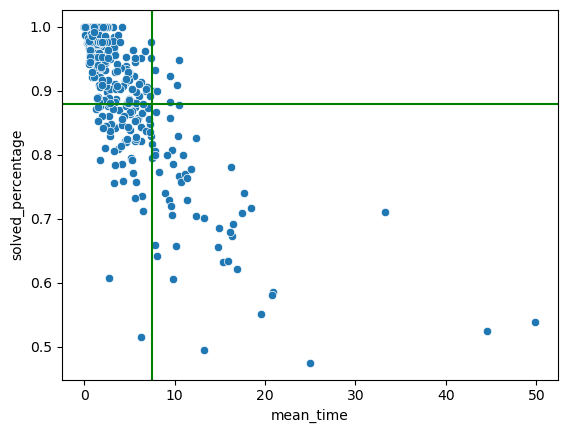


Курс 587

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.7768093773235847
Amount by segments:
╒═════╤════╕
│ 316 │  0 │
├─────┼────┤
│  18 │ 13 │
╘═════╧════╛


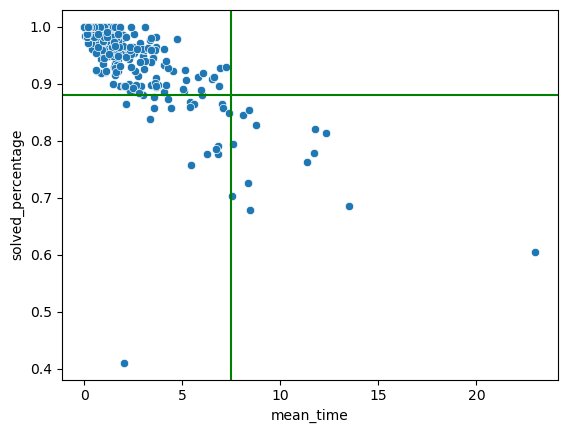


Курс ml_intro

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.6718237612318979
Amount by segments:
╒═════╤═══╕
│ 244 │ 2 │
├─────┼───┤
│  42 │ 6 │
╘═════╧═══╛


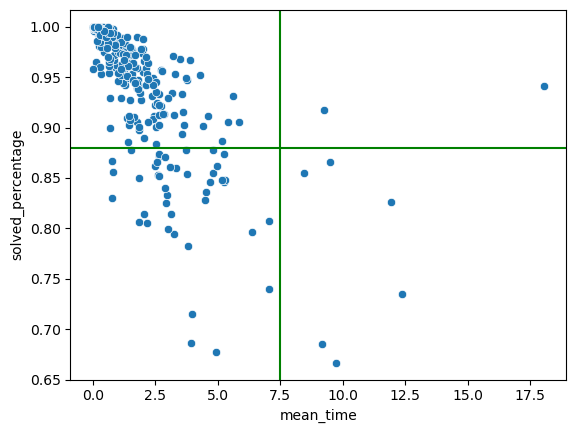


Курс 613

Metrics: mean_time, solved_percentage
Pearson correlation coefficient = -0.8595834748905178
Amount by segments:
╒═════╤═══╕
│ 142 │ 0 │
├─────┼───┤
│   3 │ 4 │
╘═════╧═══╛


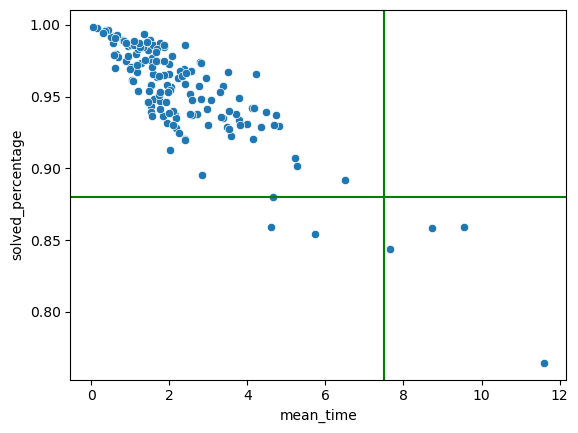

In [90]:
all_courses_linear_corr('mean_time', 'solved_percentage')

### percentage_tries

- есть значительная (везде > 0.3) корреляция с количеством задач в модуле :) предлагаю убрать

In [48]:
import plotly.express as px

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.354371902220666
Amount by segments:
╒═══╤═════╕
│ 0 │ 150 │
├───┼─────┤
│ 0 │ 519 │
╘═══╧═════╛


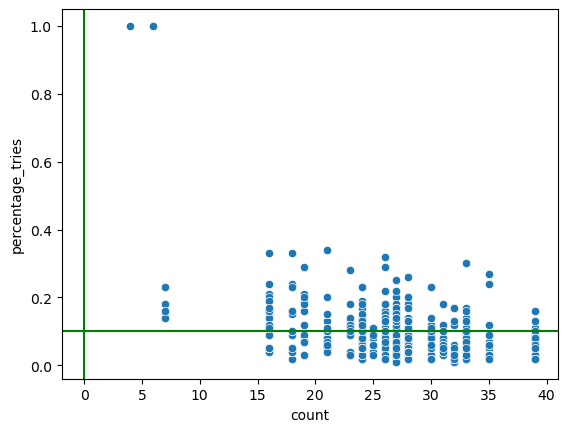

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.3759650156639847
Amount by segments:
╒═══╤═════╕
│ 0 │  49 │
├───┼─────┤
│ 0 │ 329 │
╘═══╧═════╛


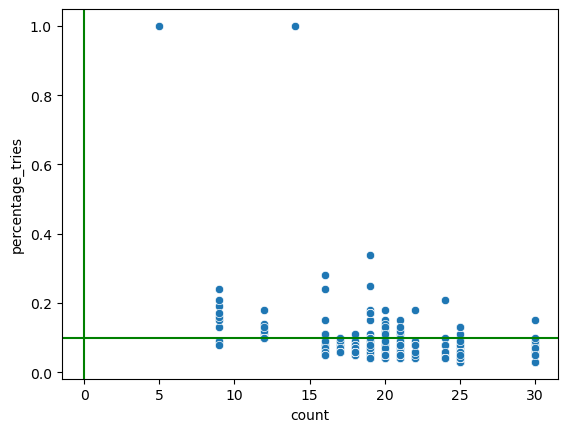

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.4016249623494251
Amount by segments:
╒═══╤═════╕
│ 0 │  94 │
├───┼─────┤
│ 0 │ 430 │
╘═══╧═════╛


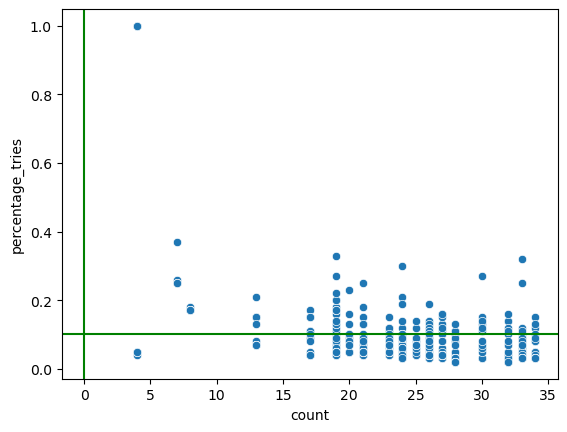

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.3274392684922995
Amount by segments:
╒═══╤═════╕
│ 0 │  28 │
├───┼─────┤
│ 0 │ 414 │
╘═══╧═════╛


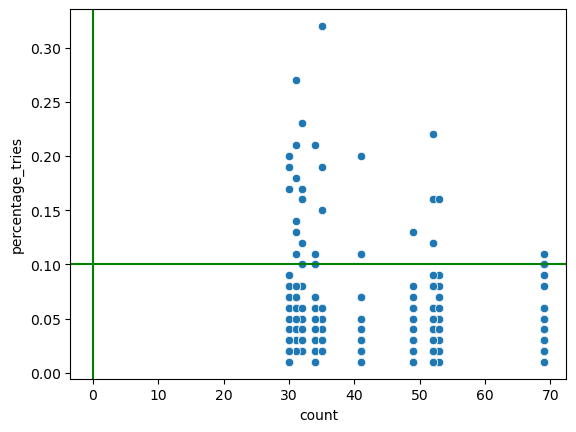

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.525627752475477
Amount by segments:
╒═══╤═════╕
│ 0 │  36 │
├───┼─────┤
│ 0 │ 312 │
╘═══╧═════╛


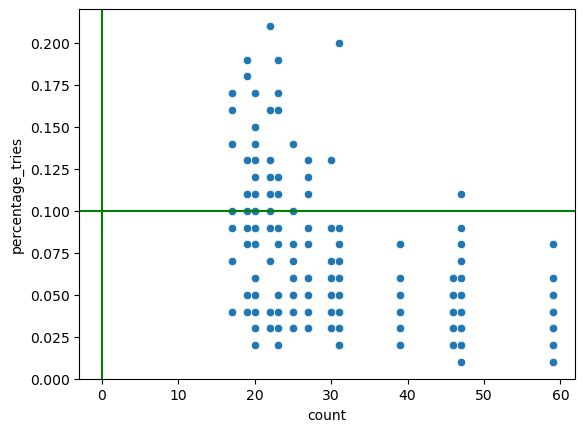

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.5019221441276753
Amount by segments:
╒═══╤══════╕
│ 0 │  199 │
├───┼──────┤
│ 0 │ 1215 │
╘═══╧══════╛


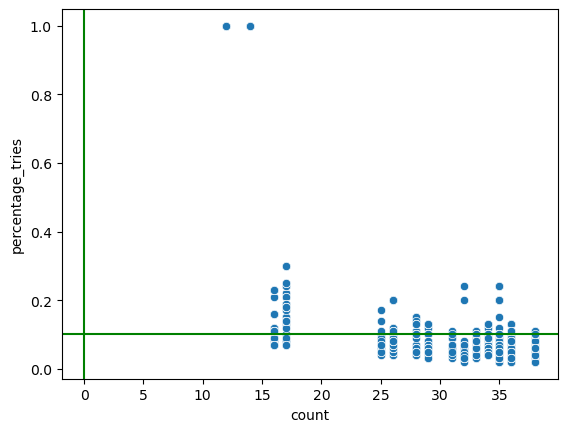

Metrics: count, percentage_tries
Pearson correlation coefficient = -0.48046350272400373
Amount by segments:
╒═══╤════╕
│ 0 │ 88 │
├───┼────┤
│ 0 │ 61 │
╘═══╧════╛


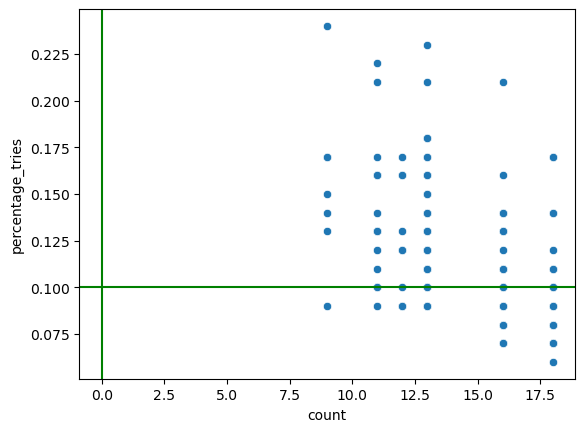

KeyError: 'diff_norm'

In [74]:
dir = 'data/courses/'

course_elements = {}
for file in os.listdir(dir):
    course_name = os.fsdecode(file)
    dict_name = re.sub("[^0-9]", "", course_name)
    if dict_name == '':
        dict_name = 'ml_intro'
    course_elements[dict_name] = pd.read_csv(dir+course_name+'/course_element.csv')

thresholds['count'] = 0
for course in courses:
    module_counts = course_elements[course].groupby('module_id').count().reset_index()[['module_id', 'element_id']].rename(columns={'element_id': 'count'})
    course_elements[course] = course_elements[course].merge(module_counts, on='module_id').set_index('element_id')

    diff_normalized_df = course_metrics[course].merge(course_elements[course], left_index=True, right_index=True)
    # diff_normalized_df['diff_norm'] = diff_normalized_df['diff_tries']/diff_normalized_df['count']
    study_correlation(diff_normalized_df, 'count', 'percentage_tries')
    # fig = px.scatter_3d(diff_normalized_df, x='diff_tries', y='count', z='percentage_tries')
    # fig.show()

del thresholds['count']

### N_tries, mean_tries_count

- что значит большое среднее число попыток и маленький N_tries? что те, кто решил задачу, в часто справлялись быстрее N попыток => много попыток сделали те, кто не решил задачу
- помогает найти задачи, для которых сильно отличается среднее число попыток среди решивших и среди не решивших
- корреляция сильная, но на некоторых курсах разделяется неплохо

Курс 638

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.7112607376505511
Amount by segments:
╒═════╤════╕
│   3 │ 30 │
├─────┼────┤
│ 528 │ 97 │
╘═════╧════╛


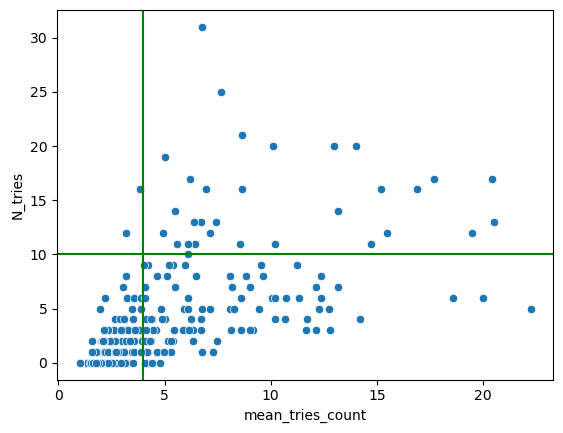


Курс 637

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.8411327714100688
Amount by segments:
╒═════╤════╕
│   4 │  6 │
├─────┼────┤
│ 358 │ 10 │
╘═════╧════╛


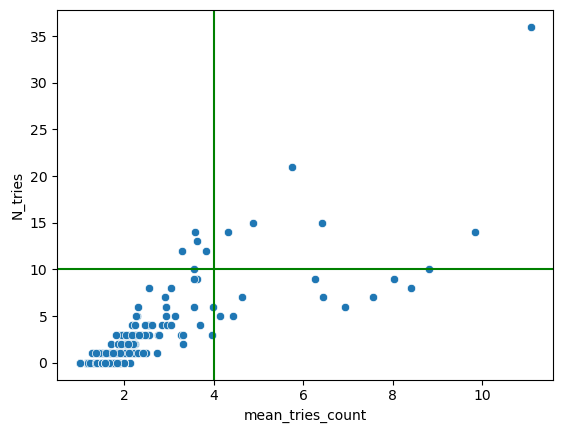


Курс 584

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.7692978066984426
Amount by segments:
╒═════╤════╕
│   3 │  8 │
├─────┼────┤
│ 452 │ 39 │
╘═════╧════╛


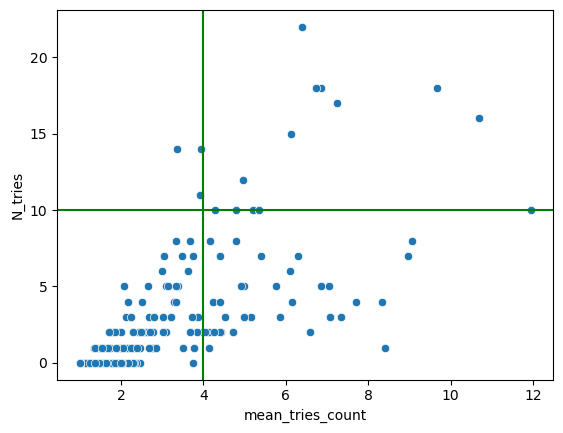


Курс 560

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.887869854909619
Amount by segments:
╒═════╤════╕
│   8 │ 90 │
├─────┼────┤
│ 302 │ 42 │
╘═════╧════╛


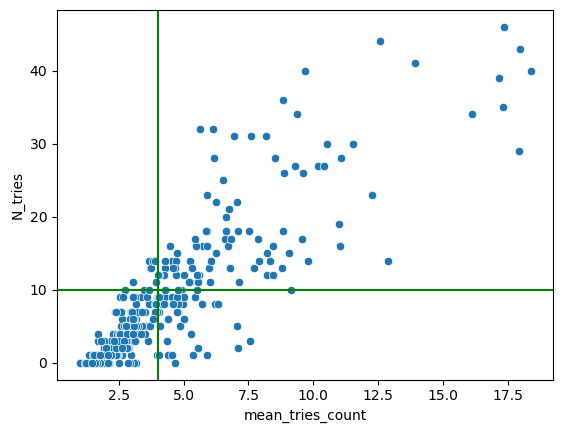


Курс 587

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.8970387809379029
Amount by segments:
╒═════╤════╕
│   5 │ 37 │
├─────┼────┤
│ 284 │ 21 │
╘═════╧════╛


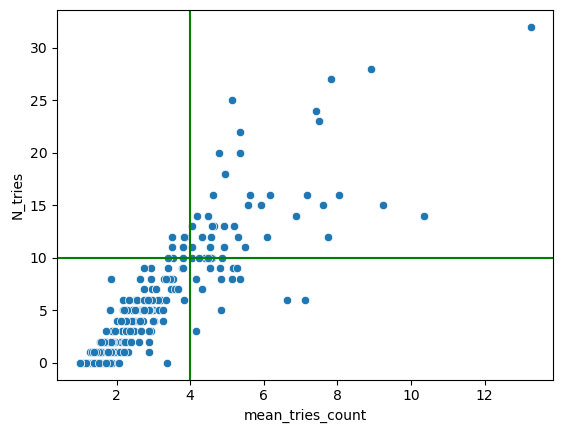


Курс ml_intro

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.9354035108773274
Amount by segments:
╒═════╤════╕
│  13 │ 56 │
├─────┼────┤
│ 221 │  4 │
╘═════╧════╛


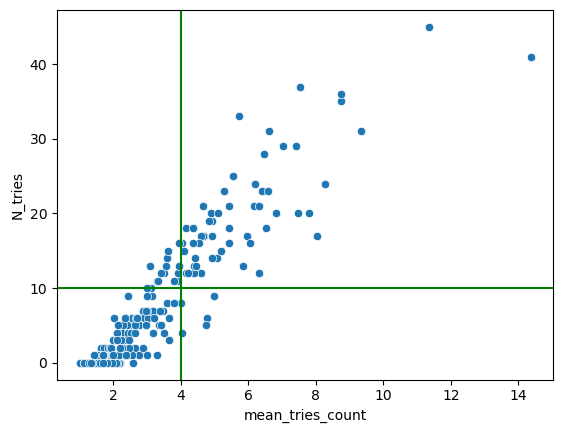


Курс 613

Metrics: mean_tries_count, N_tries
Pearson correlation coefficient = 0.8914438846896816
Amount by segments:
╒═════╤═══╕
│   0 │ 2 │
├─────┼───┤
│ 147 │ 0 │
╘═════╧═══╛


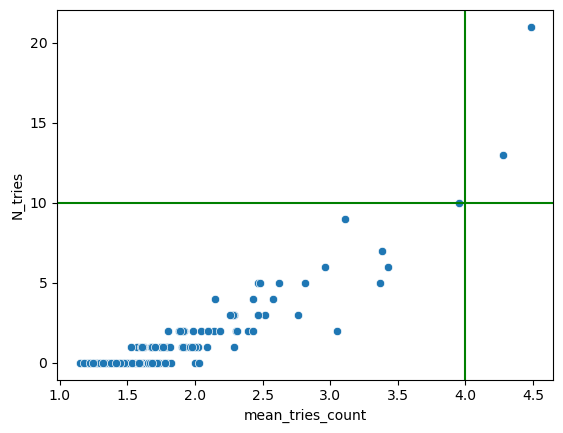

In [125]:
all_courses_linear_corr('mean_tries_count', 'N_tries')

## Выводы

In [126]:
metrics_to_drop = ['tries_std', 'diff_tries', 'percentage_tries']

for course in courses:
    course_metrics[course] = course_metrics[course].drop(columns=metrics_to_drop)

идеи для критериев:



душность:
- высокий skips_percentage
- много попыток




сложность:
- высокий lost_percentage
- много попыток
- времени на попытку - много
- низкий solved_percentage

# Нелинейности

Нелинейные связи между метриками могут быть полезны для придумывания "подсказок" в отчете.

In [166]:
def leave_hard(df, x_name, y_name):
    if x_name == 'solved_percentage':
        hard = df[(df[x_name] < thresholds[x_name]) | (df[y_name] > thresholds[y_name])]
    elif y_name == 'solved_percentage':
        hard = df[(df[x_name] > thresholds[x_name]) | (df[y_name] < thresholds[y_name])]
    else:
        hard = df[(df[x_name] > thresholds[x_name]) | (df[y_name] > thresholds[y_name])]
    return hard

def all_leave_hard(x_name, y_name):
    hard_dfs = []
    for course in courses:
        hard_dfs.append(leave_hard(course_metrics[course], x_name, y_name))
    return pd.concat(hard_dfs)

In [193]:
from sklearn.feature_selection import mutual_info_regression

def plot_mi_map(df, all=False):
    df_no_nan = df.copy()
    df_no_nan["lost_percentage"] = df["lost_percentage"].fillna(0)
    metrics_list = df_no_nan.columns
    mask = np.ones(shape=(len(metrics_list), len(metrics_list)))
    hard_mi_df = pd.DataFrame(columns=metrics_list, index=metrics_list)
    for i, y_name in enumerate(metrics_list):
        for j in range(0, i):
            x_name = metrics_list[j]
            # mi_score = mutual_info_regression(df_no_nan[[x_name]], df_no_nan[y_name])[0]
            mask[j][i] = 0
            # mi_df.loc[x_name, y_name] = float(mi_score)
            if all:
                hard_df = all_leave_hard(x_name, y_name)
                hard_df['lost_percentage'] = hard_df['lost_percentage'].fillna(0)
            else:
                hard_df = leave_hard(df_no_nan, x_name, y_name)
            hard_mi_score = mutual_info_regression(hard_df[[x_name]], hard_df[y_name])[0]
            hard_mi_df.loc[x_name, y_name] = float(hard_mi_score)
    hard_mi_df = hard_mi_df.fillna(0.0)
    sns.heatmap(hard_mi_df, mask=mask, vmin=0, vmax=1)
    plt.show()



638


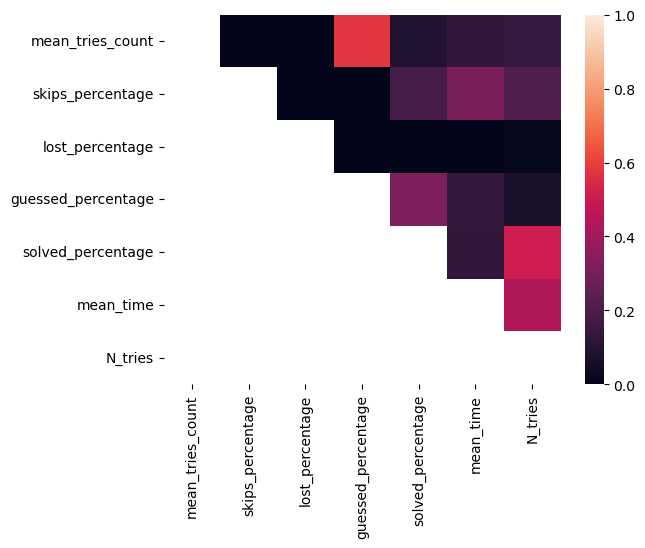

637


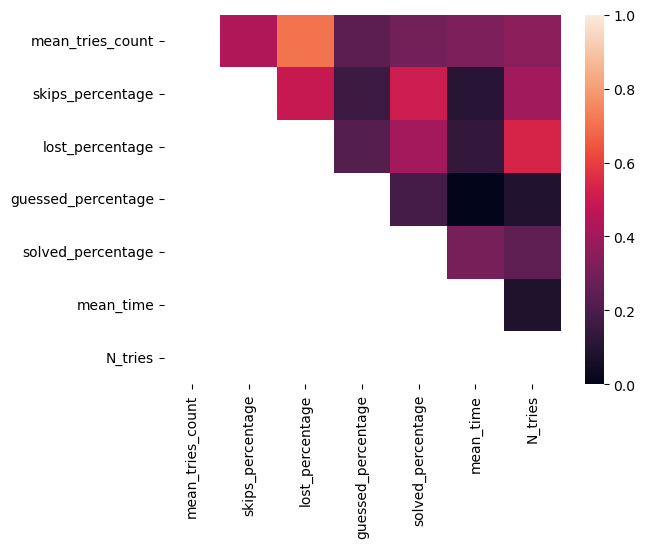

584


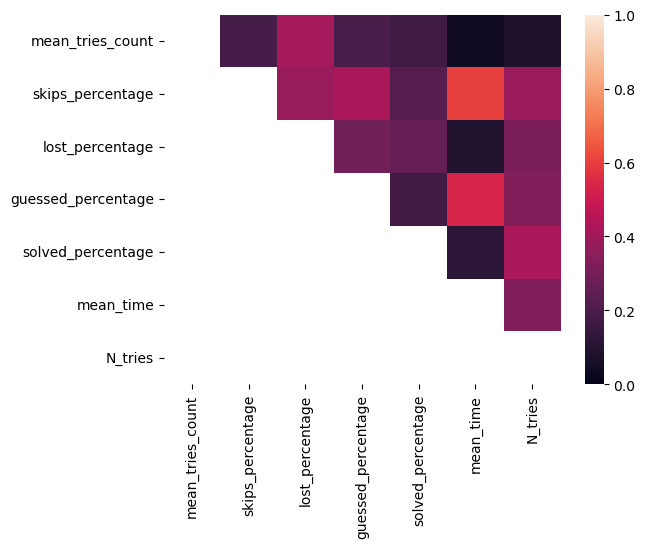

560


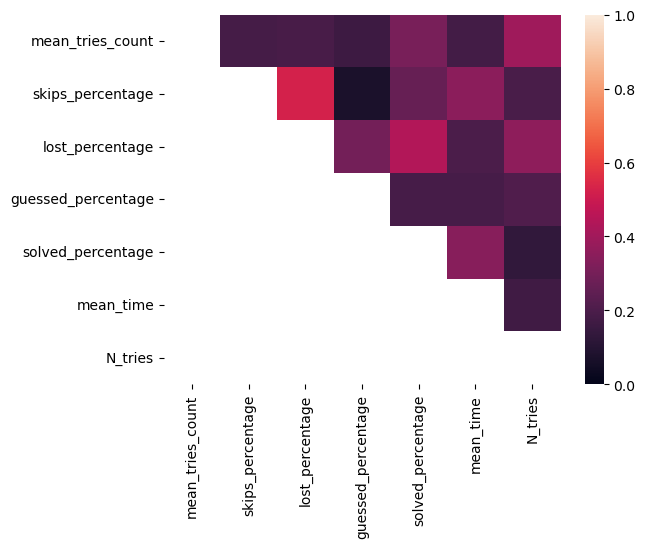

587


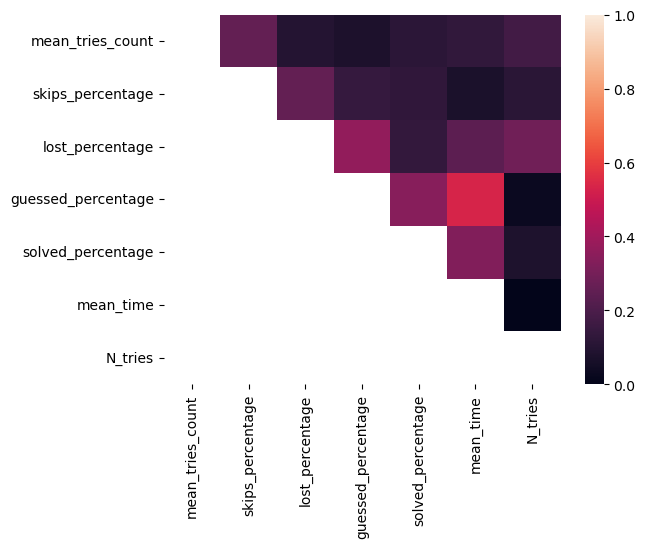

ml_intro


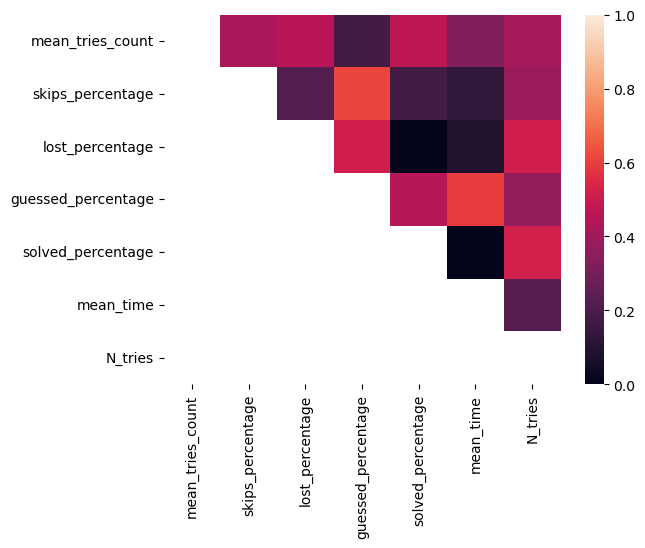

In [194]:
for course in courses:
    if course != '613': # в этом курсе очень мало сложных задач
        print(course)
        plot_mi_map(course_metrics[course])

In [209]:
def plot_hard(df, x_name, y_name, order=2):
    hard_df = leave_hard(df, x_name, y_name)
    sns.regplot(data=hard_df, x=x_name, y=y_name, order=order)
    plt.show()

def all_plot_hard(x_name, y_name):
    for course in courses:
        if course != '613':
            print(course)
            plot_hard(all_leave_hard(x_name, y_name), x_name, y_name)

In [211]:
# all_plot_hard('skips_percentage', 'mean_time')

In [165]:
# all_plot_hard('skips_percentage', 'guessed_percentage')

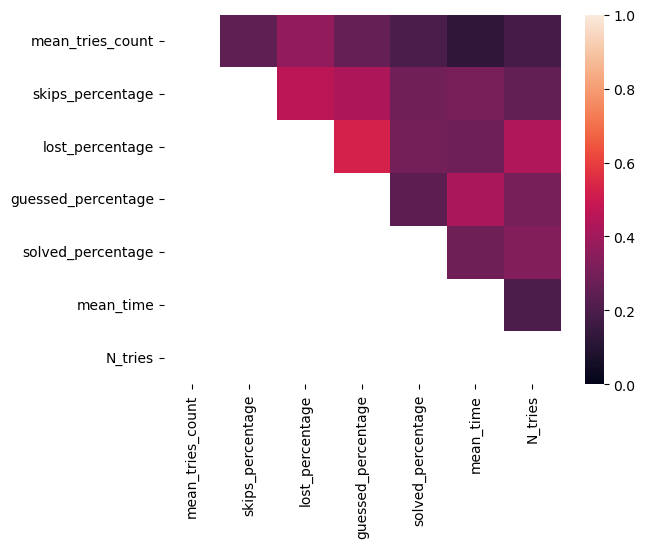

In [195]:
plot_mi_map(course_metrics['638'], all=True)

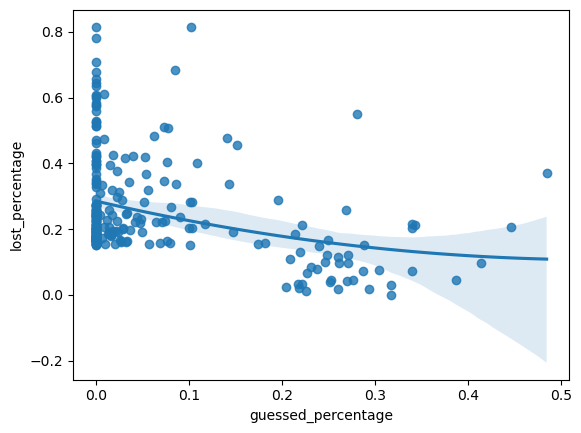

In [212]:
x_name = 'guessed_percentage'
y_name = 'lost_percentage'
plot_hard(all_leave_hard(x_name, y_name), x_name, y_name)

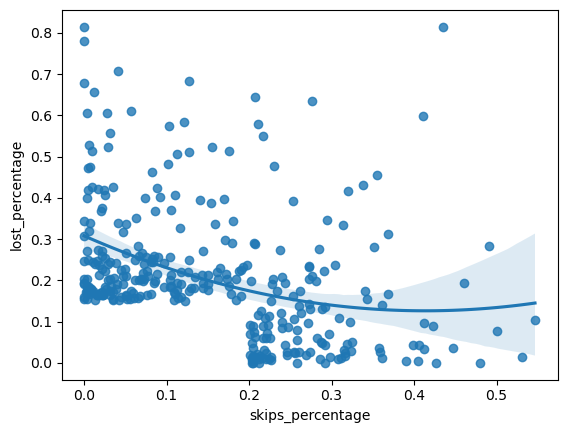

In [213]:
x_name = 'skips_percentage'
y_name = 'lost_percentage'
plot_hard(all_leave_hard(x_name, y_name), x_name, y_name)

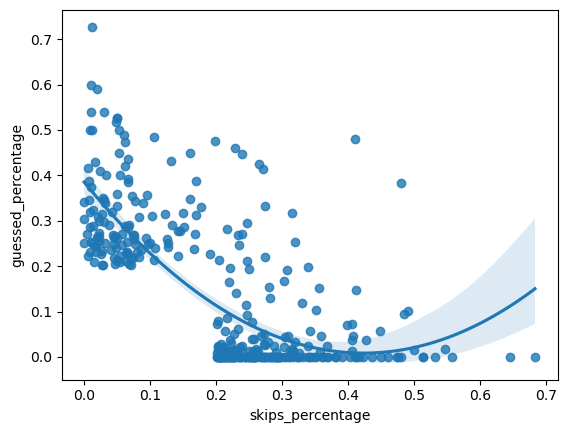

In [214]:
x_name = 'skips_percentage'
y_name = 'guessed_percentage'
plot_hard(all_leave_hard(x_name, y_name), x_name, y_name)

# Hard Counts

In [218]:
def hard_df(df):
    df_no_nan = df.copy()
    df_no_nan["lost_percentage"] = df["lost_percentage"].fillna(0)
    for metric in df.columns:
        if metric != 'solved_percentage':
            df_no_nan[f'{metric}_hard'] = (df_no_nan[metric] > thresholds[metric]).astype(int)
        else:
            df_no_nan[f'{metric}_hard'] = (df_no_nan[metric] < thresholds[metric]).astype(int)
        df_no_nan = df_no_nan.drop(columns=metric)
    return df_no_nan

Курс 638, нулей: 502


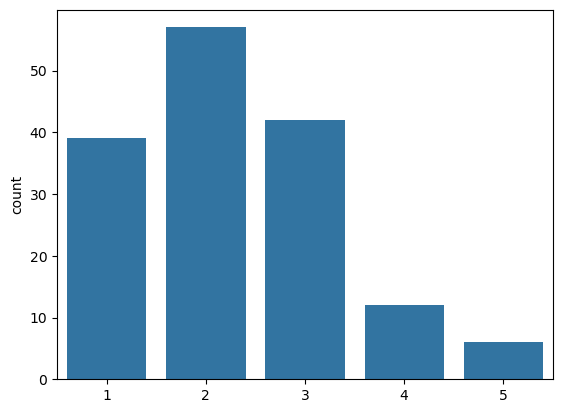

Курс 637, нулей: 335


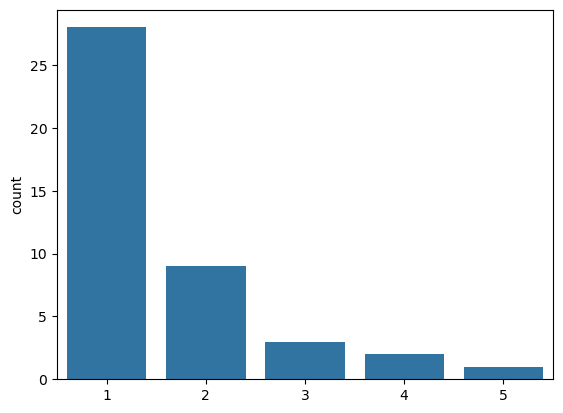

Курс 584, нулей: 381


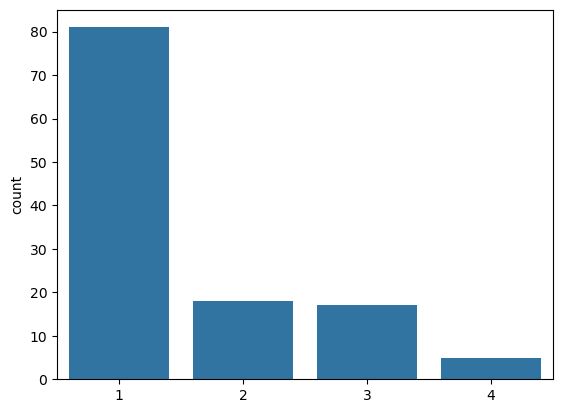

Курс 560, нулей: 232


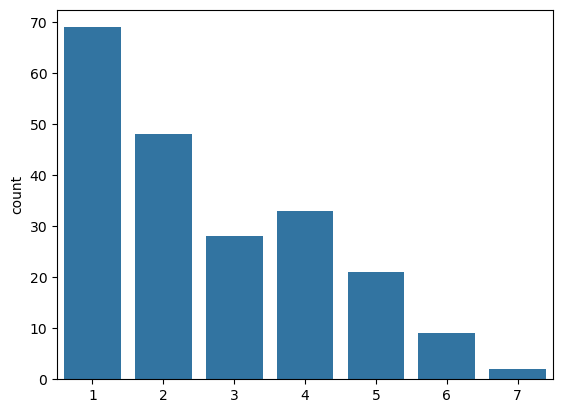

Курс 587, нулей: 233


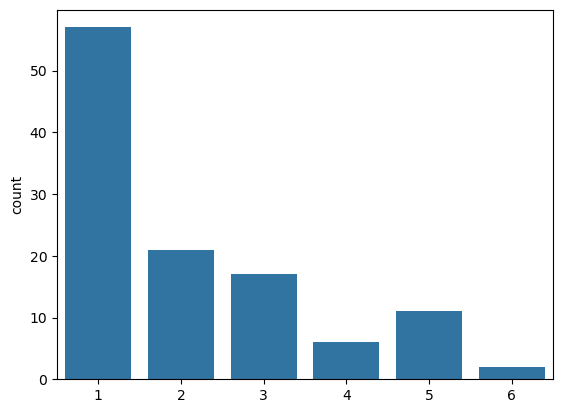

Курс ml_intro, нулей: 151


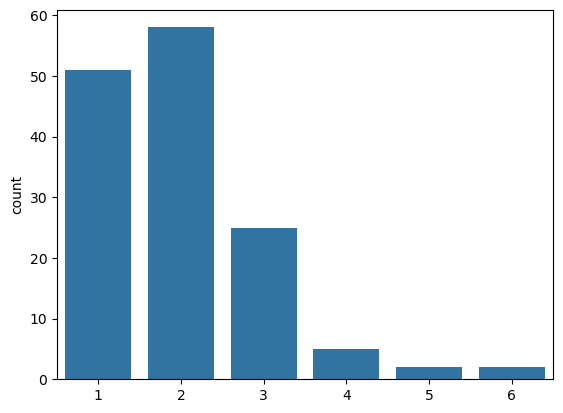

Курс 613, нулей: 115


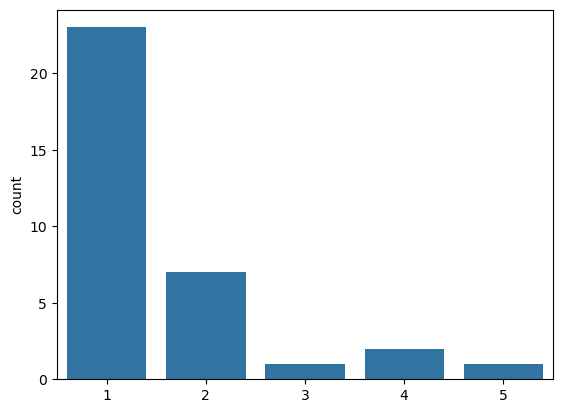

In [236]:
for course in courses:
    h = hard_df(course_metrics[course])
    data = h.sum(axis=1).value_counts()
    print(f'Курс {course}, нулей: {data[0]}')
    sns.barplot(data[1:])
    plt.show()

In [237]:
# h.groupby(by=['diff_tries_hard', 'percentage_tries_hard']).agg(count=('mean_time_hard', 'count')).reset_index()